In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
DATA_DIR = '../pickles'

In [3]:
df = pd.read_pickle(os.path.join(DATA_DIR, 'station1_normalized.pkl'))
df.head(10)

,date,ref,NO2_61FD,NO2_61F0,NO2_61EF,rh,t_grad,pressure,temp,pluvio
0,2017-09-28 10:15:00,38.5,-0.324687,-0.487027,0.433465,0.167023,-1.039505,0.375594,0.898638,0.0
1,2017-09-28 10:30:00,32.3,-0.343192,-0.325877,-0.412283,0.083982,-1.094050,0.375594,0.946776,0.0
2,2017-09-28 10:45:00,38.5,-0.010107,-0.161505,-0.198236,0.065528,-0.984961,0.375594,0.970844,0.0
3,2017-09-28 11:00:00,29.7,-0.386370,-0.554710,-0.339194,-0.063647,-0.984961,0.356064,1.091187,0.0
4,2017-09-28 11:15:00,19.4,-0.386370,-0.422567,-0.412283,-0.146688,-1.203138,0.375594,1.163393,0.0
5,2017-09-28 11:30:00,10.8,-0.386370,-0.619170,-0.412283,-0.238957,-1.039505,0.375594,1.259668,0.0
6,2017-09-28 11:45:00,12.4,-0.386370,-0.586940,-0.412283,-0.358905,-1.203138,0.375594,1.283736,0.0
7,2017-09-28 12:00:00,12.3,-0.386370,-0.619170,-0.412283,-0.405039,-1.148594,0.375594,1.307805,0.0
8,2017-09-28 12:15:00,9.7,-0.386370,-0.619170,-0.412283,-0.423493,-1.312227,0.356064,1.355942,0.0
9,2017-09-28 12:30:00,13.8,-0.386370,-0.619170,-0.412283,-0.552668,-1.475859,0.356064,1.548491,0.0


In [4]:
def from_dataframe_to_xy(df):
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh', 't_grad', 'pressure', 'pluvio']]),
            np.array(df['ref']))

def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

In [5]:
def rnn(nb_units, input_shape, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(SimpleRNN(nb_units, input_shape=input_shape, activation='relu'))#, recurrent_dropout=1))
    #model.add(Dense(nb_units, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    opti = Adam(lr=0.0003)
    model.compile(loss=loss, optimizer=opti)
    
    return model

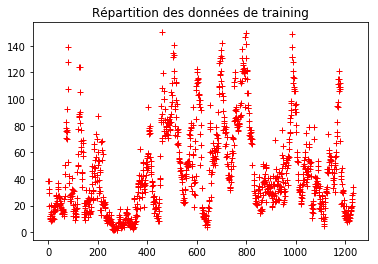

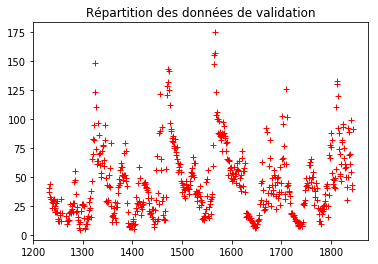

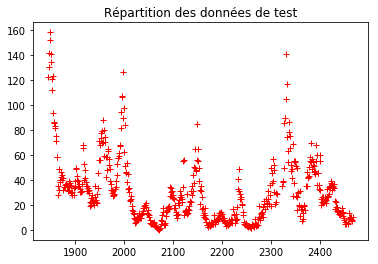

In [6]:
df_train, df_test = split_dataframe(df, 0.5)
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = from_dataframe_to_xy(df_train)
X_valid, y_valid = from_dataframe_to_xy(df_valid)
X_test, y_test = from_dataframe_to_xy(df_test)

plt.plot(df_train['ref'], '+r')
plt.title('Répartition des données de training')
plt.show()

plt.plot(df_valid['ref'], '+r')
plt.title('Répartition des données de validation')
plt.show()

plt.plot(df_test['ref'], '+r')
plt.title('Répartition des données de test')
plt.show()

In [7]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid= X_valid.reshape((X_valid.shape[0], 1,  X_valid.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [8]:
model = rnn(32, X_train.shape[1:])
early_stopping = EarlyStopping(patience=10)
history = model.fit(X_train, y_train, \
                    batch_size=32, \
                    epochs=1000, \
                    validation_data=(X_valid, y_valid), \
                    callbacks=[early_stopping])

Train on 1206 samples, validate on 603 samples
Epoch 1/1000
1206/1206 [==============================] - 0s - loss: 3216.8213 - val_loss: 2808.6640
Epoch 2/1000
1206/1206 [==============================] - 0s - loss: 3205.2410 - val_loss: 2798.3613
Epoch 3/1000
1206/1206 [==============================] - 0s - loss: 3190.8842 - val_loss: 2786.8391
Epoch 4/1000
1206/1206 [==============================] - 0s - loss: 3174.9431 - val_loss: 2772.9822
Epoch 5/1000
1206/1206 [==============================] - 0s - loss: 3156.3276 - val_loss: 2756.8720
Epoch 6/1000
1206/1206 [==============================] - 0s - loss: 3133.9954 - val_loss: 2738.0074
Epoch 7/1000
1206/1206 [==============================] - 0s - loss: 3107.4445 - val_loss: 2715.5722
Epoch 8/1000
1206/1206 [==============================] - 0s - loss: 3075.8480 - val_loss: 2689.8587
Epoch 9/1000
1206/1206 [==============================] - 0s - loss: 3039.6773 - val_loss: 2659.4839
Epoch 10/1000
1206/1206 [===================

1206/1206 [==============================] - 0s - loss: 277.3149 - val_loss: 363.8794
Epoch 82/1000
1206/1206 [==============================] - 0s - loss: 273.4977 - val_loss: 359.9966
Epoch 83/1000
1206/1206 [==============================] - 0s - loss: 269.7664 - val_loss: 356.7229
Epoch 84/1000
1206/1206 [==============================] - 0s - loss: 266.1653 - val_loss: 353.1939
Epoch 85/1000
1206/1206 [==============================] - 0s - loss: 262.5854 - val_loss: 350.0614
Epoch 86/1000
1206/1206 [==============================] - 0s - loss: 259.0872 - val_loss: 346.1925
Epoch 87/1000
1206/1206 [==============================] - 0s - loss: 255.6776 - val_loss: 343.4348
Epoch 88/1000
1206/1206 [==============================] - 0s - loss: 252.3871 - val_loss: 339.8183
Epoch 89/1000
1206/1206 [==============================] - 0s - loss: 249.0690 - val_loss: 336.9534
Epoch 90/1000
1206/1206 [==============================] - 0s - loss: 245.8678 - val_loss: 333.7704
Epoch 91/1000


1206/1206 [==============================] - 0s - loss: 131.1251 - val_loss: 189.8424
Epoch 163/1000
1206/1206 [==============================] - 0s - loss: 130.5333 - val_loss: 188.7848
Epoch 164/1000
1206/1206 [==============================] - 0s - loss: 129.9931 - val_loss: 187.1026
Epoch 165/1000
1206/1206 [==============================] - 0s - loss: 129.3995 - val_loss: 186.0704
Epoch 166/1000
1206/1206 [==============================] - 0s - loss: 128.8410 - val_loss: 185.0601
Epoch 167/1000
1206/1206 [==============================] - 0s - loss: 128.2906 - val_loss: 183.2895
Epoch 168/1000
1206/1206 [==============================] - 0s - loss: 127.8181 - val_loss: 181.6068
Epoch 169/1000
1206/1206 [==============================] - 0s - loss: 127.2767 - val_loss: 180.6383
Epoch 170/1000
1206/1206 [==============================] - 0s - loss: 126.7302 - val_loss: 179.4680
Epoch 171/1000
1206/1206 [==============================] - 0s - loss: 126.2362 - val_loss: 178.6556
Epoch

1206/1206 [==============================] - 0s - loss: 109.7885 - val_loss: 131.8807
Epoch 244/1000
1206/1206 [==============================] - 0s - loss: 109.6767 - val_loss: 130.9644
Epoch 245/1000
1206/1206 [==============================] - 0s - loss: 109.5924 - val_loss: 131.0302
Epoch 246/1000
1206/1206 [==============================] - 0s - loss: 109.5282 - val_loss: 130.6007
Epoch 247/1000
1206/1206 [==============================] - 0s - loss: 109.4189 - val_loss: 130.5062
Epoch 248/1000
1206/1206 [==============================] - 0s - loss: 109.3302 - val_loss: 129.9618
Epoch 249/1000
1206/1206 [==============================] - 0s - loss: 109.2488 - val_loss: 130.1025
Epoch 250/1000
1206/1206 [==============================] - 0s - loss: 109.1421 - val_loss: 129.5855
Epoch 251/1000
1206/1206 [==============================] - 0s - loss: 109.0689 - val_loss: 129.2304
Epoch 252/1000
1206/1206 [==============================] - 0s - loss: 108.9742 - val_loss: 129.0005
Epoch

1206/1206 [==============================] - 0s - loss: 105.6906 - val_loss: 118.1233
Epoch 325/1000
1206/1206 [==============================] - 0s - loss: 105.6863 - val_loss: 118.0291
Epoch 326/1000
1206/1206 [==============================] - 0s - loss: 105.6618 - val_loss: 117.7909
Epoch 327/1000
1206/1206 [==============================] - 0s - loss: 105.6482 - val_loss: 118.1281
Epoch 328/1000
1206/1206 [==============================] - 0s - loss: 105.5965 - val_loss: 117.8186
Epoch 329/1000
1206/1206 [==============================] - 0s - loss: 105.6586 - val_loss: 117.9049
Epoch 330/1000
1206/1206 [==============================] - 0s - loss: 105.6470 - val_loss: 117.5871
Epoch 331/1000
1206/1206 [==============================] - 0s - loss: 105.5439 - val_loss: 117.6537
Epoch 332/1000
1206/1206 [==============================] - 0s - loss: 105.4959 - val_loss: 117.6280
Epoch 333/1000
1206/1206 [==============================] - 0s - loss: 105.4987 - val_loss: 117.4076
Epoch

1206/1206 [==============================] - 0s - loss: 104.3033 - val_loss: 114.0698
Epoch 406/1000
1206/1206 [==============================] - 0s - loss: 104.2925 - val_loss: 114.0659
Epoch 407/1000
1206/1206 [==============================] - 0s - loss: 104.3078 - val_loss: 113.7905
Epoch 408/1000
1206/1206 [==============================] - 0s - loss: 104.2795 - val_loss: 114.2698
Epoch 409/1000
1206/1206 [==============================] - 0s - loss: 104.2729 - val_loss: 114.0141
Epoch 410/1000
1206/1206 [==============================] - 0s - loss: 104.2550 - val_loss: 113.9149
Epoch 411/1000
1206/1206 [==============================] - 0s - loss: 104.2122 - val_loss: 113.8102
Epoch 412/1000
1206/1206 [==============================] - 0s - loss: 104.2332 - val_loss: 113.8506
Epoch 413/1000
1206/1206 [==============================] - 0s - loss: 104.2256 - val_loss: 113.8234
Epoch 414/1000
1206/1206 [==============================] - 0s - loss: 104.2527 - val_loss: 113.5328
Epoch

In [9]:
model.evaluate(X_test, y_test, verbose=0)

148.41184522616152

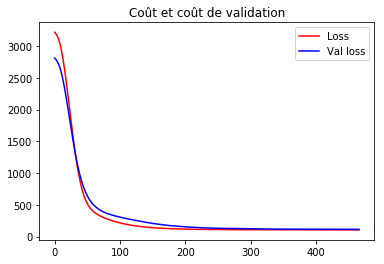

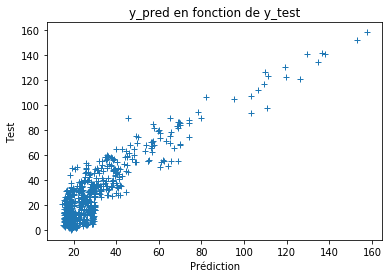

In [10]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()

In [11]:
def rnn_plus_dense(nb_units, input_shape, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(SimpleRNN(nb_units, input_shape=input_shape, activation='relu'))#, recurrent_dropout=1))
    model.add(Dense(nb_units, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    opti = Adam(lr=0.0003)
    model.compile(loss=loss, optimizer=opti)
    
    return model

In [12]:
model = rnn_plus_dense(32, X_train.shape[1:])
history = model.fit(X_train, y_train, \
                    batch_size=32, \
                    epochs=1000, \
                    validation_data=(X_valid, y_valid), \
                    callbacks=[early_stopping])

Train on 1206 samples, validate on 603 samples
Epoch 1/1000
1206/1206 [==============================] - 0s - loss: 3212.3939 - val_loss: 2797.2158
Epoch 2/1000
1206/1206 [==============================] - 0s - loss: 3193.1375 - val_loss: 2773.3233
Epoch 3/1000
1206/1206 [==============================] - 0s - loss: 3163.0979 - val_loss: 2738.0059
Epoch 4/1000
1206/1206 [==============================] - 0s - loss: 3116.0359 - val_loss: 2682.7861
Epoch 5/1000
1206/1206 [==============================] - 0s - loss: 3039.7070 - val_loss: 2596.6494
Epoch 6/1000
1206/1206 [==============================] - 0s - loss: 2919.2827 - val_loss: 2463.4732
Epoch 7/1000
1206/1206 [==============================] - 0s - loss: 2737.4464 - val_loss: 2275.5828
Epoch 8/1000
1206/1206 [==============================] - 0s - loss: 2488.6079 - val_loss: 2045.4527
Epoch 9/1000
1206/1206 [==============================] - 0s - loss: 2180.1515 - val_loss: 1771.8161
Epoch 10/1000
1206/1206 [===================

1206/1206 [==============================] - 0s - loss: 113.9256 - val_loss: 157.3715
Epoch 83/1000
1206/1206 [==============================] - 0s - loss: 113.4232 - val_loss: 154.8247
Epoch 84/1000
1206/1206 [==============================] - 0s - loss: 112.9748 - val_loss: 153.6536
Epoch 85/1000
1206/1206 [==============================] - 0s - loss: 112.3965 - val_loss: 153.0652
Epoch 86/1000
1206/1206 [==============================] - 0s - loss: 111.9651 - val_loss: 152.5425
Epoch 87/1000
1206/1206 [==============================] - 0s - loss: 111.6786 - val_loss: 150.4401
Epoch 88/1000
1206/1206 [==============================] - 0s - loss: 111.1130 - val_loss: 149.1003
Epoch 89/1000
1206/1206 [==============================] - 0s - loss: 110.6463 - val_loss: 148.7138
Epoch 90/1000
1206/1206 [==============================] - 0s - loss: 110.1663 - val_loss: 147.2891
Epoch 91/1000
1206/1206 [==============================] - 0s - loss: 109.7130 - val_loss: 145.5025
Epoch 92/1000


1206/1206 [==============================] - 0s - loss: 86.0070 - val_loss: 102.9194
Epoch 164/1000
1206/1206 [==============================] - 0s - loss: 85.7194 - val_loss: 104.1732
Epoch 165/1000
1206/1206 [==============================] - 0s - loss: 85.2038 - val_loss: 103.6690
Epoch 166/1000
1206/1206 [==============================] - 0s - loss: 84.9156 - val_loss: 103.7070
Epoch 167/1000
1206/1206 [==============================] - 0s - loss: 84.4650 - val_loss: 103.9233
Epoch 168/1000
1206/1206 [==============================] - 0s - loss: 84.1796 - val_loss: 102.6993
Epoch 169/1000
1206/1206 [==============================] - 0s - loss: 83.7538 - val_loss: 101.9895
Epoch 170/1000
1206/1206 [==============================] - 0s - loss: 83.3291 - val_loss: 101.8535
Epoch 171/1000
1206/1206 [==============================] - 0s - loss: 83.0956 - val_loss: 101.1872
Epoch 172/1000
1206/1206 [==============================] - 0s - loss: 82.6572 - val_loss: 101.1112
Epoch 173/1000


1206/1206 [==============================] - 0s - loss: 61.2384 - val_loss: 83.6927
Epoch 246/1000
1206/1206 [==============================] - 0s - loss: 61.0620 - val_loss: 85.4231
Epoch 247/1000
1206/1206 [==============================] - 0s - loss: 60.9622 - val_loss: 84.2211
Epoch 248/1000
1206/1206 [==============================] - 0s - loss: 60.6031 - val_loss: 84.9299
Epoch 249/1000
1206/1206 [==============================] - 0s - loss: 60.4454 - val_loss: 83.1794
Epoch 250/1000
1206/1206 [==============================] - 0s - loss: 60.5387 - val_loss: 84.5423
Epoch 251/1000
1206/1206 [==============================] - 0s - loss: 60.1124 - val_loss: 84.7924
Epoch 252/1000
1206/1206 [==============================] - 0s - loss: 59.9977 - val_loss: 82.8527
Epoch 253/1000
1206/1206 [==============================] - 0s - loss: 59.9256 - val_loss: 85.8314
Epoch 254/1000
1206/1206 [==============================] - 0s - loss: 59.5949 - val_loss: 84.8464
Epoch 255/1000
1206/1206 

In [13]:
model.evaluate(X_test, y_test, verbose=0)

111.50711241463162

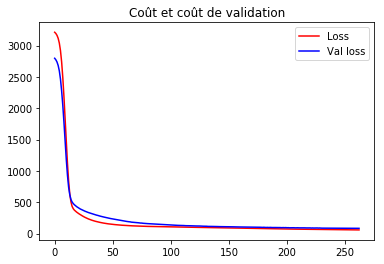

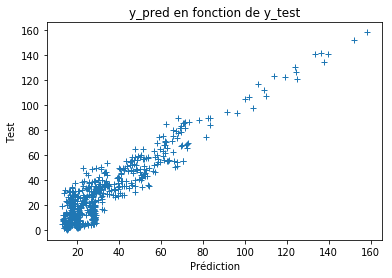

In [14]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()